# Import necessary libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Read data

In [21]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [22]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
#drop the ID column as index as it is not needed for prediction
df_train.drop('ID',inplace=True,axis=1)
df_test.drop('ID',inplace=True,axis=1)

In [25]:
print(df_train.columns)
print(df_test.columns)

Index(['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=376)


In [26]:
print(df_train.shape)
print(df_test.shape)

(4209, 377)
(4209, 376)


# Droppping columns with variance Zero

In [27]:
Zero_var_col = df_train.var()[df_train.var()==0].index.values
Zero_var_col

C:\Users\RC\AppData\Local\Temp/ipykernel_14460/953165727.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Zero_var_col = df_train.var()[df_train.var()==0].index.values


array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [28]:
# Deleting the lables having var == 0
df_train.drop(Zero_var_col,axis = 1,inplace=True)
df_test.drop(Zero_var_col,axis = 1,inplace=True)

In [29]:
# Cross check
df_train.columns

Index(['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)

In [30]:
np.sum(df_train.isna().sum())

0

In [31]:
np.sum(df_test.isna().sum())

0

In [32]:
#for i in df_train.columns:
#    print(df_train[i].unique())

In [33]:
# identifying categorical columns
label_columns = df_train.describe(include=['object']).columns.values
label_columns

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [34]:
df_train['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

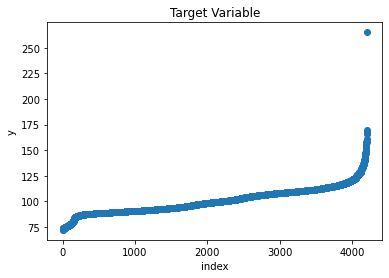

In [35]:
plt.scatter(range(df_train.shape[0]),np.sort(df_train["y"]))
plt.title("Target Variable")
plt.xlabel("index")
plt.ylabel("y")
plt.show()

# Apply Label Encoding

In [36]:
le = LabelEncoder()

for col in label_columns:
    le.fit(df_train[col].append(df_test[col]).values)
    df_train[col]= le.transform(df_train[col])
    df_test[col]= le.transform(df_test[col])

In [37]:
df_train.columns

Index(['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)

In [38]:
# cross checking if lables are encoded to numbers
df_train['X0'].unique()

array([37, 24, 46, 11, 41, 49, 36, 34, 45, 40, 23, 32, 50, 51,  9, 10, 12,
       52, 43, 18, 15, 48,  6,  0, 31,  8, 30, 16, 29,  1, 26, 17, 35, 44,
       25, 22, 28, 47,  4, 19, 39, 38, 21, 14,  3, 33,  2])

# Performing dimentionality reduction

In [39]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 0.98,svd_solver='full')

X = df_train.drop('y',axis=1)
y = df_train['y']

In [40]:
# Performing train test & split
X_train , X_val , y_train , y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
pca.fit(X)

PCA(n_components=0.98, svd_solver='full')

In [42]:
pca.n_components_

12

In [43]:
pca.explained_variance_ratio_

array([0.40868988, 0.21758508, 0.13120081, 0.10783522, 0.08165248,
       0.0140934 , 0.00660951, 0.00384659, 0.00260289, 0.00214378,
       0.00209857, 0.00180388])

# Predicting using XGBoost

In [44]:
pca_X_train = pd.DataFrame(pca.transform(X_train))
pca_X_val = pd.DataFrame(pca.transform(X_val)) 
pca_test = pd.DataFrame(pca.transform(df_test))

In [45]:
# Initialising the model
model = xgb.XGBRegressor(objective='reg:linear',learning_rate=0.1)

In [46]:
#Fitting the model
model.fit(pca_X_train,y_train)

[12:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [47]:
#predict on the validaiton set
pred_y_val = model.predict(pca_X_val)

In [48]:
#capture the MSE to get a measure of how accurate the predictions were
mse_score = mean_squared_error(y_val,pred_y_val)

In [49]:
#print the MSE score
print(mse_score)

80.85413991467865


In [50]:
pred_y_test = model.predict(pca_test)

In [51]:
pred_y_test

array([ 76.18256 ,  94.49736 ,  79.11515 , ...,  97.971825, 112.31151 ,
        93.14507 ], dtype=float32)

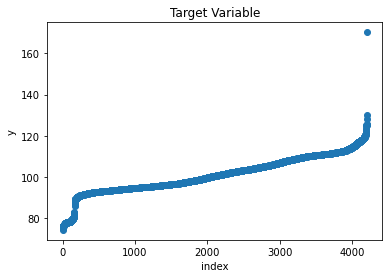

In [52]:
plt.scatter(range(pred_y_test.shape[0]),np.sort(pred_y_test))
plt.title("Target Variable")
plt.xlabel("index")
plt.ylabel("y")
plt.show()